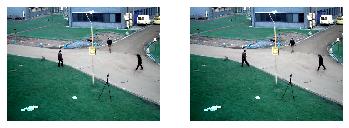

In [49]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

video = cv2.VideoCapture('vtest.avi')
success, org_img1 = video.read()
if success:
        success, org_img2 = video.read()
        if not success:
            print("Error in getting image from video file")
else:
    print("Error in getting image from video file")

# size = img1.shape   

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(org_img1)
plt.axis('off')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(org_img2)
plt.axis('off')
plt.show

img1 = cv2.cvtColor(org_img1, cv2.COLOR_BGR2GRAY)    
img2 = cv2.cvtColor(org_img2, cv2.COLOR_BGR2GRAY)  


<function matplotlib.pyplot.show(*args, **kw)>

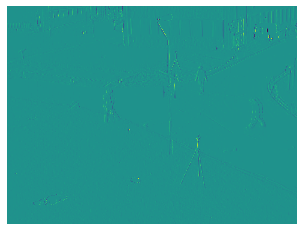

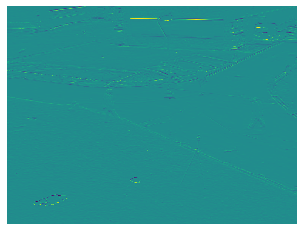

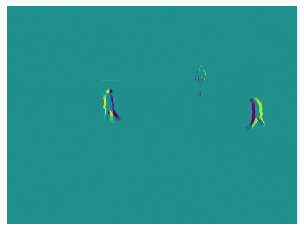

In [50]:
# import scipy.ndimage as ndimage
from scipy.ndimage.filters import convolve
from scipy.signal import convolve as scipy_convolve
# from astropy.convolution import convolve
x_kernel = np.array([[-1,1],[-1,1]])
y_kernel = np.array([[-1,-1],[1,1]])
t_kernel_1 = np.array([[-1,-1],[-1,-1]])
t_kernel_2 = np.array([[1,1],[1,1]])

# print(x_kernel)
# print(y_kernel)
# print(t_kernel_1)
# print(t_kernel_2)

img1 = np.array(img1)
img2 = np.array(img2)

# print(img1)

conv1 = scipy_convolve(img1, x_kernel, mode='same', method='direct')
conv2 = scipy_convolve(img2, x_kernel, mode='same', method='direct')
fx = conv1 + conv2
conv1 = scipy_convolve(img1, y_kernel, mode='same', method='direct')
conv2 = scipy_convolve(img2, y_kernel, mode='same', method='direct')
fy = conv1 + conv2
conv1 = scipy_convolve(img1, t_kernel_1, mode='same', method='direct')
conv2 = scipy_convolve(img2, t_kernel_2, mode='same', method='direct')
ft = conv1 + conv2
# print(fx)
plt.figure()
plt.imshow(fx, cmap = 'viridis')
plt.axis('off')
plt.show
plt.figure()
plt.imshow(fy, cmap = 'viridis')
plt.axis('off')
plt.show
plt.figure()
plt.imshow(ft, cmap = 'viridis')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

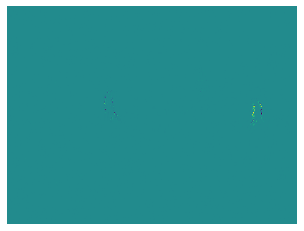

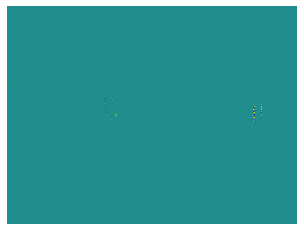

In [51]:
u_mean = 0.0
v_mean = 0.0
u = 0.0
v = 0.0
lambda_1 = 1

for i in range(0,10):
    P = (fx*u_mean)+(fy*v_mean)+ft
    D = lambda_1+(fx**2)+(fy**2)
    u = u_mean-(fx*(P/D))
    v = v_mean-(fy*(P/D))
    u_mean = np.mean(u)
    v_mean = np.mean(v)
    
plt.figure()
plt.imshow(u, cmap = 'viridis')
plt.axis('off')
plt.show
plt.figure()
plt.imshow(v, cmap = 'viridis')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

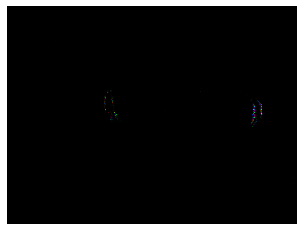

In [56]:
# hsv = org_img1
hsv = np.zeros((u.shape[0],u.shape[1],3), np.uint8)
mag, ang = cv2.cartToPolar(u,v)
hsv[..., 0] = ang*180/np.pi/2
hsv[..., 1] = 255
hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

plt.figure()
plt.imshow(rgb)
plt.axis('off')
plt.show

In [63]:
def flow(img1, img2, lambda_1, max_iter):
    x_kernel = np.array([[-1,1],[-1,1]])
    y_kernel = np.array([[-1,-1],[1,1]])
    t_kernel_1 = np.array([[-1,-1],[-1,-1]])
    t_kernel_2 = np.array([[1,1],[1,1]])
    
    conv1 = scipy_convolve(img1, x_kernel, mode='same', method='direct')
    conv2 = scipy_convolve(img2, x_kernel, mode='same', method='direct')
    fx = conv1 + conv2
    conv1 = scipy_convolve(img1, y_kernel, mode='same', method='direct')
    conv2 = scipy_convolve(img2, y_kernel, mode='same', method='direct')
    fy = conv1 + conv2
    conv1 = scipy_convolve(img1, t_kernel_1, mode='same', method='direct')
    conv2 = scipy_convolve(img2, t_kernel_2, mode='same', method='direct')
    ft = conv1 + conv2
    
    u_mean = 0.0
    v_mean = 0.0
    u = 0.0
    v = 0.0
    
    for i in range(0,max_iter):
        P = (fx*u_mean)+(fy*v_mean)+ft
        D = lambda_1+(fx**2)+(fy**2)
        u = u_mean-(fx*(P/D))
        v = v_mean-(fy*(P/D))
        u_mean = np.mean(u)
        v_mean = np.mean(v)
    
    hsv = np.zeros((u.shape[0],u.shape[1],3), np.uint8)
    mag, ang = cv2.cartToPolar(u,v)
    hsv[..., 0] = ang*180/np.pi/2
    hsv[..., 1] = 255
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

#     plt.figure()
#     plt.imshow(rgb)
#     plt.axis('off')
#     plt.show

    return hsv

    
video = cv2.VideoCapture('vtest.avi')
height , width , layers =  hsv.shape
print(height, width)
video_flow = cv2.VideoWriter('video_flow.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 10, (width,height))

for i in range(0,100):
    success, org_img1 = video.read()
    if success:
            success, org_img2 = video.read()
            if not success:
                print("Error in getting image from video file")
    else:
        print("Error in getting image from video file")
    
    img1 = cv2.cvtColor(org_img1, cv2.COLOR_BGR2GRAY)    
    img2 = cv2.cvtColor(org_img2, cv2.COLOR_BGR2GRAY)
    
    hsv = flow(img1, img2, 1, 10)
    video_flow.write(hsv)

video.release()
video_flow.release()
cv2.destroyAllWindows()


576 768
